# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing data

In [2]:
dataset = pd.read_csv('../data/housing.csv')
dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Rearranged columns for ease

In [3]:
parking = dataset.pop('parking')

In [4]:
type(parking)

pandas.core.series.Series

In [5]:
dataset.insert(5,column=parking.name,value=parking) # keep the numerical value together

In [6]:
dataset

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,yes,no,no,no,yes,yes,furnished
1,12250000,8960,4,4,4,3,yes,no,no,no,yes,no,furnished
2,12250000,9960,3,2,2,2,yes,no,yes,no,no,yes,semi-furnished
3,12215000,7500,4,2,2,3,yes,no,yes,no,yes,yes,furnished
4,11410000,7420,4,1,2,2,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,yes,no,yes,no,no,no,unfurnished
541,1767150,2400,3,1,1,0,no,no,no,no,no,no,semi-furnished
542,1750000,3620,2,1,1,0,yes,no,no,no,no,no,unfurnished
543,1750000,2910,3,1,1,0,no,no,no,no,no,no,furnished


# Get insight from dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   parking           545 non-null    int64 
 6   mainroad          545 non-null    object
 7   guestroom         545 non-null    object
 8   basement          545 non-null    object
 9   hotwaterheating   545 non-null    object
 10  airconditioning   545 non-null    object
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
parking             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
prefarea            0
furnishingstatus    0
dtype: int64

#### No null value, so no need to handle null values

# Data preprocessing

In [9]:
columns_need_to_encode = dataset.select_dtypes('object').columns.tolist() # get the colummns that have dtype 'object'

In [10]:
columns_need_to_encode.remove('furnishingstatus') # we will encode it diffrently with ranking

In [11]:
columns_need_to_encode

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [13]:
ct = ColumnTransformer(transformers=[('encoder-1',OrdinalEncoder(),columns_need_to_encode)],remainder='passthrough')

In [14]:
dataset.iloc[:,6:12] = ct.fit_transform(dataset.iloc[:,6:12])

In [15]:
dataset

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,furnished
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,furnished
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,semi-furnished
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,furnished
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,unfurnished
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,semi-furnished
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,unfurnished
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,furnished


In [16]:
dataset['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

### Ranks
    - unfurnished => 0
    - semi-furnished => 1
    - furnished => 2

In [17]:
ranks = ['unfurnished','semi-furnished','furnished'] 

In [18]:
oe = OrdinalEncoder(categories=[ranks])

In [19]:
dataset['furnishingstatus'] = oe.fit_transform(dataset[['furnishingstatus']])

In [20]:
dataset.head(10)

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,2.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,2.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,2.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,2.0
5,10850000,7500,3,3,1,2,1.0,0.0,1.0,0.0,1.0,1.0,1.0
6,10150000,8580,4,3,4,2,1.0,0.0,0.0,0.0,1.0,1.0,1.0
7,10150000,16200,5,3,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9870000,8100,4,1,2,2,1.0,1.0,1.0,0.0,1.0,1.0,2.0
9,9800000,5750,3,2,4,1,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [21]:
from matplotlib import colormaps
print(colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted

In [22]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


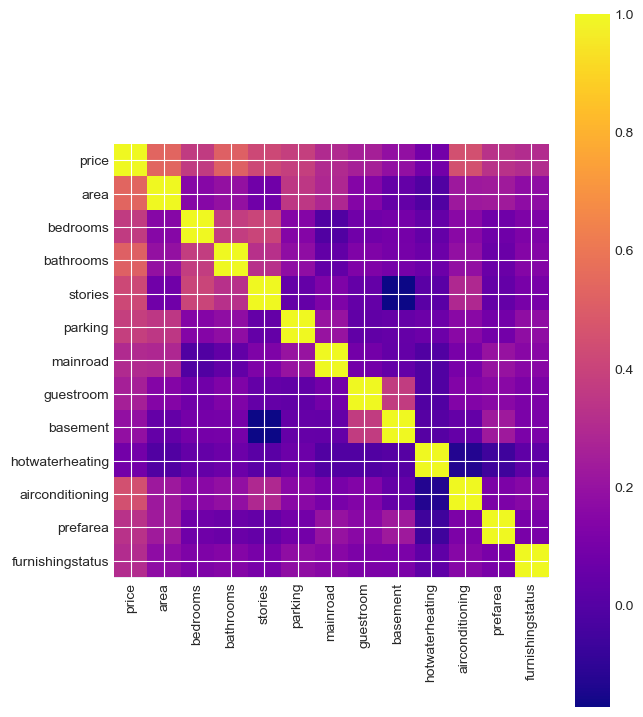

In [23]:
plt.figure(figsize=(7,9))
plt.style.use('seaborn-v0_8-darkgrid')
plt.imshow(dataset.corr(), cmap='plasma')
plt.colorbar()
plt.xticks(range(len(dataset.columns)), dataset.columns,rotation='vertical')
plt.yticks(range(len(dataset.columns)), dataset.columns)
plt.show()

# Data spliting

In [24]:
X = dataset.drop('price',axis=1)
y = dataset['price']

In [25]:
X.head(5)

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,2.0
1,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,2.0
2,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,2.0
4,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,2.0


In [26]:
y.head(5)

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [29]:
X_train

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
405,3060,3,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276,4400,2,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
228,3630,3,1,2,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
378,2275,3,1,3,0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
150,5136,3,1,2,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
430,2500,2,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145,5000,3,1,4,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
140,5800,3,2,4,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
500,2800,3,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X_test

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
351,3600,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
235,5680,3,1,2,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0
60,6000,3,2,2,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
126,7160,3,1,1,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0
357,6930,4,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80,6000,3,1,2,1,1.0,0.0,0.0,1.0,0.0,1.0,1.0
529,3970,3,1,2,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
290,2610,4,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74,4040,3,1,2,1,1.0,0.0,1.0,1.0,0.0,0.0,2.0


In [31]:
y_test

351    3780000
235    4620000
60     7140000
126    5880000
357    3773000
        ...   
80     6629000
529    2275000
290    4200000
74     6650000
273    4340000
Name: price, Length: 109, dtype: int64

In [32]:
y_train

405    3465000
276    4305000
228    4690000
378    3640000
150    5600000
        ...   
430    3290000
145    5600000
140    5740000
500    2660000
421    3360000
Name: price, Length: 436, dtype: int64

# Feature scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
ss = StandardScaler()

In [35]:
X_train = np.array(ss.fit_transform(X_train))

In [36]:
X_train

array([[-0.96742879,  0.0245348 , -0.56274914, ..., -0.68050514,
        -0.56322335, -1.19956344],
       [-0.36146469, -1.31261174, -0.56274914, ..., -0.68050514,
        -0.56322335,  0.10796071],
       [-0.70966794,  0.0245348 , -0.56274914, ..., -0.68050514,
        -0.56322335,  0.10796071],
       ...,
       [ 0.27163214,  0.0245348 ,  1.40011987, ...,  1.46949661,
        -0.56322335, -1.19956344],
       [-1.08500392,  0.0245348 , -0.56274914, ..., -0.68050514,
        -0.56322335, -1.19956344],
       [-0.20319048, -1.31261174, -0.56274914, ..., -0.68050514,
        -0.56322335, -1.19956344]])

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
model = lr.fit(X_train,y_train) # train the dataste

In [40]:
X_test = np.array(ss.fit_transform(X_test))

In [41]:
y_pred = model.predict(X_test)

# Model evaluation

In [42]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import math

In [43]:
r2 = r2_score(y_pred,y_test)

In [44]:
r2

0.31316944205869435

In [45]:
mse = mean_squared_error(y_pred,y_test)
math.sqrt(mse)

1172582.9081274634

In [46]:
mae = mean_absolute_error(y_pred,y_test)
mae

860632.9197367819

In [47]:
from sklearn.svm import SVR

In [48]:
svr = SVR(kernel='poly',degree=5, gamma='auto') # degree =>. polynomial function's degree, kernel =>. type of function, gamma => kernel coefficient

In [49]:
svr_model = svr.fit(X_train,y_train)

In [50]:
svr_pred = svr.predict(X_test)

In [51]:
r2 = r2_score(svr_pred,y_test)
r2

-2000456869.6192777

In [52]:
mse = mean_squared_error(svr_pred,y_test)
math.sqrt(mse)

1923215.5914559963

In [53]:
mae = mean_absolute_error(svr_pred,y_test)
mae

1382449.4795761977